### Github Repository
https://github.com/MathiasDamsgaard/Comp_Social_Sci_Assigments.git

### Contribution statement
We all helped each other with the different parts of the assignment, as we all sat toghether when reviewing the exercises from the first four weeks. While Andreas finished up part 1, Mathias corrected the answers for part 2, and Anton added the code for part 3 and part 4, before we all looked thorugh each others work.

In [9]:
# Imports
import json
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import netwulf as wulf
import random
from matplotlib import pyplot as plt

### Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5.
> __Exercise: Analyzing Networks through a Random Model__ 
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula).
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.

In [3]:
# 3.1
with open('data/authors_network_small.json', 'r') as f:
    data = json.load(f)
G = nx.node_link_graph(data)

# Calculate the number of edges in the network
L = G.number_of_edges()

# Calculate the number of nodes in the network
N = G.number_of_nodes()

# Calculate the average degree of the network
k = 2*L/N

# Calculate the probability p
p = k/(N-1)

print(f"Probability of a link between two nodes: {p:.2e}")

def generate_random_network(N, p):
    # Create an empty graph
    G = nx.Graph()

    # Add N nodes
    G.add_nodes_from(range(N))

    # Add edges between nodes with probability p
    for i in tqdm(range(N-1)):
        for j in range(i+1, N):
            if np.random.uniform() < p:
                G.add_edge(i, j)
    return G

G_rand = generate_random_network(N, p)

Probability of a link between two nodes: 6.85e-04


100%|██████████| 10948/10948 [01:56<00:00, 94.33it/s]  


> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below).

In [7]:
# Visualize the random network with netwulf
wulf.visualize(G_rand, config={'zoom': 0.6, 'node_gravity': 0.2, 'node_charge': -50, 'node_size': 10,
                                 'link_distance': 20, 'node_size_variation': 0.55})

(None, None)

> * Answer the following questions __(max 200 words in total)__: 
>   - What regime does your random network fall into? Is it above or below the critical threshold?
>   The random network falls into the ... regime.
>   - According to the textbook, what does the network's structure resemble in this regime?
>   
>   - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
>   


> 2. _Degree Distribution_: This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.
> * Compute the distribution of degree for the random network using the numpy function ``np.histogram``. Choose bins, and normalization strategies appropriately. **Hint:** Revisit the content from Week 3, Part 3 of the lectures.  

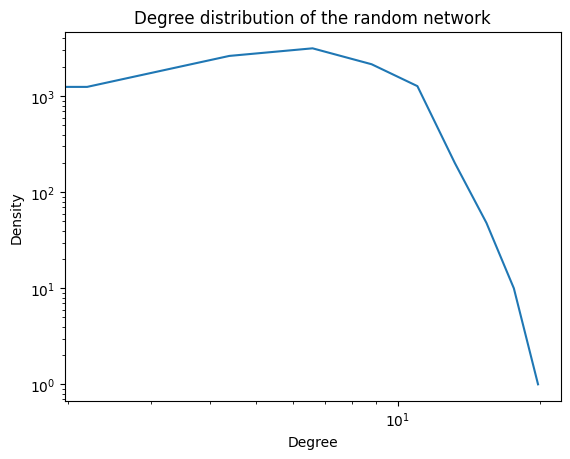

In [11]:
# Compute the distribution of degree for the random network
degree_sequence_rd = [d for _, d in G_rand.degree()]
hist_rd, bins = np.histogram(degree_sequence_rd, bins=10)
plt.plot(bins[:-1], hist_rd)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.title('Degree distribution of the random network')
plt.show()

> * Compute the distribution of degree for the Computational Social Scientists network using the numpy function ``np.histogram``. Also here, choose bins and normalization strategies wisely, based on the recommendations from previous lectures.

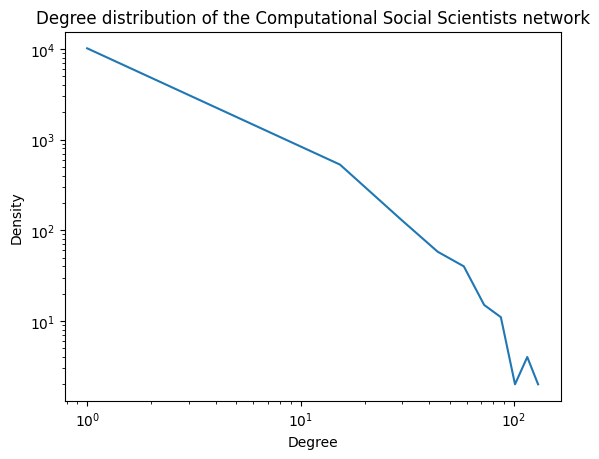

In [12]:
# Compute the distribution of degree for the Computational Social Scientists network
degree_sequence = [d for _, d in G.degree()]
hist, bins = np.histogram(degree_sequence, bins=10)
plt.plot(bins[:-1], hist)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.title('Degree distribution of the Computational Social Scientists network')
plt.show()

> * Plot both degree distributions on the same figure using line plots, ensuring the x and y axes are scaled in a way that allows for comparison between the two distributions.

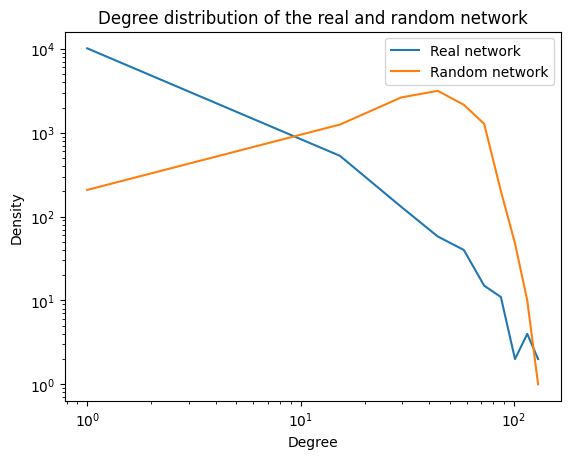

In [13]:
# Plot both degree distributions on the same figure using line plots
plt.plot(bins[:-1], hist, label='Real network')
plt.plot(bins[:-1], hist_rd, label='Random network')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.title('Degree distribution of the real and random network')
plt.legend()
plt.show()

> * Add two vertical lines showing the average degree for the random and the real network.

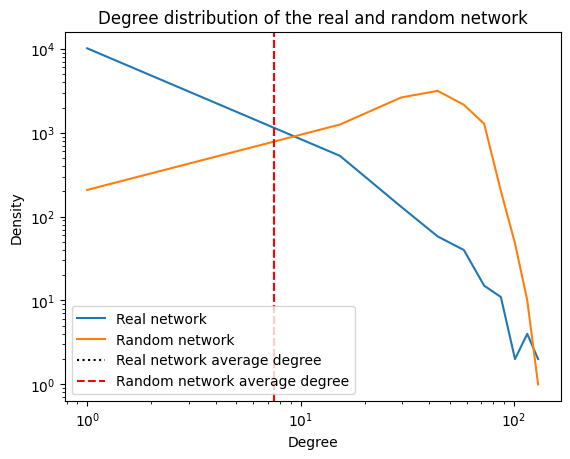

In [17]:
# Add two vertical lines showing the average degree for the random and the real network
plt.plot(bins[:-1], hist, label='Real network')
plt.plot(bins[:-1], hist_rd, label='Random network')
plt.axvline(k, color='black', linestyle=':', label='Real network average degree')
plt.axvline(np.mean(degree_sequence_rd), color='red', linestyle='--', label='Random network average degree')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.title('Degree distribution of the real and random network')
plt.legend()
plt.show()

> * Answer the following questions __(max 200 words in total)__: 
>    - Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties. 
>    - What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties? (max 150 words)

### Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6. 

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**
>
> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.
> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.
>
>
> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.
>
> __Part 4: Assortativity by Degree__
>
> 5. *Calculate degree assortativity* for your network using the formula discussed in the lecture.
> 6. *Compare your network's degree assortativity* against that of 100 random networks generated via the configuration model. Analyze whether your network shows a tendency for high-degree scientists to connect with other high-degree scientists and vice versa. 
>
> __Part 5: Reflection questions (max 250 words for the 3 questions)__    
> 7. *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?    
> 8. *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing *e_1* from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?    
> 9. *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.    




> **Exercise 2: Central nodes.** Remember to write your answers in the notebook. 
> * Find the 5 most central scientists according to the closeness centrality. What role do you imagine scientists with high closeness centrality play? 
> * Find the 5 most central scientists according to eigenvector centrality.     
> * Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?    
> * Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

### Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)
>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?
> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).
> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 
>   * Describe similarities and differences between the communities.
>   * Why aren't the TFs not necessarily a good description of the communities?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?
> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?

 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?

 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__